In [234]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [235]:
#load data
#Input data - [X value, Y value, Bias term]
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

#Associated output labels - First 2 examples are labeled '-1' and last 3 are labeled '+1'
y = np.array([-1,-1,1,1,1])

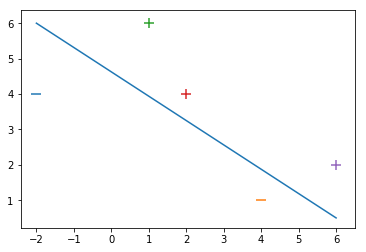

In [236]:
#lets plot these examples on a 2D graph!
#for each example
for d, sample in enumerate(X):
    # Plot the negative samples (the first 2)
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples (the last 3)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
#we'll two points and draw the line between them (naive guess)
plt.plot([-2,6],[6,0.5])

In [237]:
#lets perform stochastic gradient descent to learn the seperating hyperplane between both classes
def svm_sgd_plot(X, Y):
    #Initialize our SVMs weight vector with zeros (3 values)
    w = np.zeros(3)
    #The learning rate
    eta = .95
    #how many iterations to train for
    epochs = 100000
    #store misclassifications so we can plot how they change over time
    errors = []

    #training part, gradient descent part
    for epoch in range(1,epochs):

        for i, x in enumerate(X):
            #misclassification
            if (Y[i]*np.dot(X[i], w)) < 1:
                #misclassified update for ours weights
                w=w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
               
            else:
                #correct classification, update our weights
                w =w+ eta * (-2  *(1/epoch)* w)
       
    return w

In [238]:
w=svm_sgd_plot(X, y)
w

array([ 2.11679 ,  2.94937 , 14.180745])

(2.1167899999999964, 2.1167899999999964)

(2.9493699999999947, 2.9493699999999947)

(-2.9493699999999947, 2.9493699999999947)

(2.1167899999999964, -2.1167899999999964)

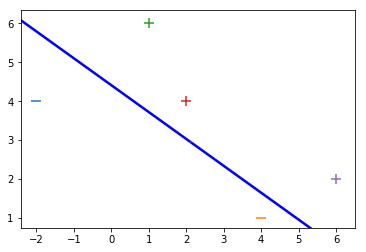

In [239]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)


# Print the hyperplane calculated by svm_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
display(X,Y,U,V)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')